In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

#### Unique Tree ID Number - tree_id - (Automatically generated by 2015 census software Integer Unique identification number for each tree point.)
#### Identification number of the blockface that the tree is mapped on- block_id
#### Date trees were mapped - created_at (Automatically generated by 2015 census software Date The date tree points were collected in the census software.)
#### Diameter at breast height of tree - tree_dbh(inch.)
#### Diameter of stump - stump_diam (inch.)
#### Whether tree is along or offset from the curb - curb_loc 
#### Tree Status - status 
#### Tree Health - health  
#### Scientific / latin name of tree species - spc_latin
#### Common name of tree species - spc_common
#### stewardship observed - steward 
#### Presence and type of tree guard - guards
#### Sidewalk damage immediately adjacent to tree - sidewalk
#### Category of user who collected this tree point - user_type
#### Root problems caused by paving stones in the tree bed - root_stone
#### Root problems caused by metal grates - root_grate
#### Presence of other root problems - root_other
#### Trunk problems caused by rope or wires - trunk_wire
#### Trunk problems caused by lights - trnk_light
#### Presence of other trunk problems - trnk_other
#### Branch problems caused by lights or wires - brch_light
#### Branch problems caused by shoes - brch_shoe
#### Presence of other branch problems - brch_other
#### Estimated street - address 
#### Zipcode - zipcode 
#### Community Board - cb_num 
#### Borough Numeric Code - borocode 
values:
1 (Manhattan)
2 (Bronx)
3 (Brooklyn)
4 (Queens)
5 (Staten Island)

#### Borough Name - boroname 
#### Domain Values:
Manhattan
Bronx
Brooklyn
Queens
Staten Island
#### NYC Council District - cncldist 
#### NY State Assembly District - st_assem 
#### NY State Senate District - st_senate 
#### Neighborhood Tabulation Area Code - nta
#### Neighborhood Tabulation Area Name - nta_name (Agrregate trees by neighborhood)
#### Census Tract - boro_ct 
#### State - state 
#### Latitude of tree point - latitude 
#### Longitude of tree point - longitude

In [3]:
tree_census= pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

In [4]:
tree_census

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [5]:
tree_census.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [6]:
tree_census_df = tree_census [['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude']]
                               #'x_sp', 'y_sp', 'council district',
       #'census tract', 'bin', 'bbl'],
      #dtype='object')

In [7]:
tree_census_df.isna().sum()

tree_id                0
block_id               0
created_at             0
tree_dbh               0
stump_diam             0
curb_loc               0
status                 0
health             31616
spc_latin          31619
spc_common         31619
steward            31615
guards             31616
sidewalk           31616
user_type              0
problems           31664
root_stone             0
root_grate             0
root_other             0
trunk_wire             0
trnk_light             0
trnk_other             0
brch_light             0
brch_shoe              0
brch_other             0
address                0
postcode               0
zip_city               0
community board        0
borocode               0
borough                0
cncldist               0
st_assem               0
st_senate              0
nta                    0
nta_name               0
boro_ct                0
state                  0
latitude               0
longitude              0
dtype: int64

In [8]:
tree_census_df['guards'].value_counts()

None       572306
Helpful     51866
Harmful     20252
Unsure       7748
Name: guards, dtype: int64

In [9]:
tree_census_subset = tree_census[['tree_id', 
                                  #'block_id', 'created_at', 
                                  'tree_dbh', 'stump_diam',
                                  'curb_loc', 'status', 'health', 'spc_latin', 
                                 'spc_common', 
                                  'steward',
                                  'guards', 
                                  'sidewalk', 
                                  'user_type', 
                                  'problems', 'root_stone',
                                  'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
                                  'brch_light', 'brch_shoe', 'brch_other', 
                                  'address', 'postcode',
                                  'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
                                  'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
                                  'latitude', 'longitude'
                                  #'x_sp', 'y_sp', 'council district',
                                  #'census tract', 'bin', 'bbl'
                                  ]]
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115


In [10]:
#tree_census_subset.isna().sum()

In [11]:
tree_census_subset[tree_census_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,21-023 24 DRIVE,11102,Astoria,401,4,Queens,22,36,12,QN72,Steinway,4009500,New York,40.774993,-73.922037
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,300 EAST MOSHOLU PARKWAY SOUTH,10458,Bronx,207,2,Bronx,11,80,36,BX43,Norwood,2042500,New York,40.871927,-73.882349
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,1691 DEKALB AVENUE,11237,Brooklyn,304,3,Brooklyn,37,53,18,BK77,Bushwick North,3044500,New York,40.705742,-73.917849
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,295 ROMA AVENUE,10306,Staten Island,503,5,Staten Island,50,64,24,SI25,Oakwood-Oakwood Beach,5012806,New York,40.559061,-74.106038
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,22-063 37 STREET,11105,Astoria,401,4,Queens,22,36,13,QN72,Steinway,4011700,New York,40.772483,-73.909073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,156 EAST 95 STREET,10128,New York,108,1,Manhattan,5,68,28,MN40,Upper East Side-Carnegie Hill,1015801,New York,40.785136,-73.951109
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,2327 BEDFORD AVENUE,11226,Brooklyn,317,3,Brooklyn,40,42,21,BK95,Erasmus,3079400,New York,40.647154,-73.955619
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,419 HOLDRIDGE AVENUE,10312,Staten Island,503,5,Staten Island,51,62,24,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5017600,New York,40.528544,-74.165246
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,140 STRYKER STREET,11223,Brooklyn,315,3,Brooklyn,47,45,22,BK26,Gravesend,3038600,New York,40.590385,-73.972892


In [12]:
# Convert 'tree_id' to string and update the DataFrame
tree_census_subset['tree_id'] = tree_census_subset['tree_id'].astype(str)


C:\Users\Marta\AppData\Local\Temp\ipykernel_2148\3961970085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_census_subset['tree_id'] = tree_census_subset['tree_id'].astype(str)


In [13]:
# Assuming tree_census_subset is your DataFrame
tree_census_subset[['tree_dbh', 'stump_diam']].describe()

,tree_dbh,stump_diam
count,683788.000000,683788.000000
mean,11.279787,0.432463
std,8.723042,3.290241
min,0.000000,0.000000
25%,4.000000,0.000000
50%,9.000000,0.000000
75%,16.000000,0.000000
max,450.000000,140.000000


In [14]:
tree_census_subset['steward'].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [15]:
tree_census_subset['curb_loc'].value_counts()

OnCurb            656896
OffsetFromCurb     26892
Name: curb_loc, dtype: int64

In [16]:
tree_census_subset['health'].value_counts()

Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

In [17]:
stumps = tree_census_subset[tree_census_subset['status']== 'Stump']
stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,21-023 24 DRIVE,11102,Astoria,401,4,Queens,22,36,12,QN72,Steinway,4009500,New York,40.774993,-73.922037
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,22-063 37 STREET,11105,Astoria,401,4,Queens,22,36,13,QN72,Steinway,4011700,New York,40.772483,-73.909073
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,2676 BEDFORD AVENUE,11210,Brooklyn,314,3,Brooklyn,45,42,21,BK42,Flatbush,3077000,New York,40.637379,-73.953814
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,113-001 JEWEL AVENUE,11375,Forest Hills,406,4,Queens,29,27,15,QN17,Forest Hills,4075702,New York,40.725300,-73.839376
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,301 EAST 66 STREET,10065,New York,108,1,Manhattan,5,76,28,MN31,Lenox Hill-Roosevelt Island,1011800,New York,40.764914,-73.960857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,281 SOUTH 2 STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3052300,New York,40.711246,-73.956418
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,No,No,No,No,No,No,No,No,No,43-035 216 STREET,11361,Bayside,411,4,Queens,19,26,11,QN46,Bayside-Bayside Hills,4147100,New York,40.761032,-73.765688
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,2327 BEDFORD AVENUE,11226,Brooklyn,317,3,Brooklyn,40,42,21,BK95,Erasmus,3079400,New York,40.647154,-73.955619
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,419 HOLDRIDGE AVENUE,10312,Staten Island,503,5,Staten Island,51,62,24,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5017600,New York,40.528544,-74.165246


In [18]:
Deads = tree_census_subset[tree_census_subset['status']== 'Dead']
Deads

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,300 EAST MOSHOLU PARKWAY SOUTH,10458,Bronx,207,2,Bronx,11,80,36,BX43,Norwood,2042500,New York,40.871927,-73.882349
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,1691 DEKALB AVENUE,11237,Brooklyn,304,3,Brooklyn,37,53,18,BK77,Bushwick North,3044500,New York,40.705742,-73.917849
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,295 ROMA AVENUE,10306,Staten Island,503,5,Staten Island,50,64,24,SI25,Oakwood-Oakwood Beach,5012806,New York,40.559061,-74.106038
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,111 DIAMOND STREET,11222,Brooklyn,301,3,Brooklyn,33,50,26,BK76,Greenpoint,3057100,New York,40.726271,-73.947287
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,413 EAST 79 STREET,10075,New York,108,1,Manhattan,5,76,28,MN32,Yorkville,1013600,New York,40.771992,-73.951657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,489 EAST 183 STREET,10458,Bronx,206,2,Bronx,15,78,33,BX01,Claremont-Bathgate,2038500,New York,40.855136,-73.892756
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,417 METROPOLITAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713867,-73.954529
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,936 EAST 231 STREET,10466,Bronx,212,2,Bronx,12,83,36,BX44,Williamsbridge-Olinville,2042400,New York,40.889713,-73.851001
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,156 EAST 95 STREET,10128,New York,108,1,Manhattan,5,68,28,MN40,Upper East Side-Carnegie Hill,1015801,New York,40.785136,-73.951109


In [19]:
17654+13961

31615

#### Assumption
#### The missing values we got at the beginning are more or less the same as the total for dead and stumps 
#### which we guess what happened was that if the tree is not alive, they didn't bother or didn't think it was relevant to fill in the 
#### information for 
health
spc_latin     
spc_common    
steward       
guards        
sidewalk      
problems 

In [20]:
tree_problems = tree_census_subset[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_problems

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No


In [21]:
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


In [22]:
mask =((tree_census_subset['status']=='Stump')|(tree_census_subset['status']=='Dead'))

In [23]:
tree_census_subset.loc[mask]=tree_census_subset.loc[mask].fillna('Not Applicable')

In [24]:
tree_census_subset[tree_census_subset['status']=='Stump']

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude
37,211205,0,16,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No,No,21-023 24 DRIVE,11102,Astoria,401,4,Queens,22,36,12,QN72,Steinway,4009500,New York,40.774993,-73.922037
239,203597,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable,No,No,No,No,No,No,No,No,No,22-063 37 STREET,11105,Astoria,401,4,Queens,22,36,13,QN72,Steinway,4011700,New York,40.772483,-73.909073
641,179766,0,30,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No,No,2676 BEDFORD AVENUE,11210,Brooklyn,314,3,Brooklyn,45,42,21,BK42,Flatbush,3077000,New York,40.637379,-73.953814
644,180619,0,10,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No,No,113-001 JEWEL AVENUE,11375,Forest Hills,406,4,Queens,29,27,15,QN17,Forest Hills,4075702,New York,40.725300,-73.839376
646,208828,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable,No,No,No,No,No,No,No,No,No,301 EAST 66 STREET,10065,New York,108,1,Manhattan,5,76,28,MN31,Lenox Hill-Roosevelt Island,1011800,New York,40.764914,-73.960857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable,No,No,No,No,No,No,No,No,No,281 SOUTH 2 STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3052300,New York,40.711246,-73.956418
683686,191219,0,25,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,NYC Parks Staff,Not Applicable,No,No,No,No,No,No,No,No,No,43-035 216 STREET,11361,Bayside,411,4,Queens,19,26,11,QN46,Bayside-Bayside Hills,4147100,New York,40.761032,-73.765688
683695,170888,0,5,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No,No,2327 BEDFORD AVENUE,11226,Brooklyn,317,3,Brooklyn,40,42,21,BK95,Erasmus,3079400,New York,40.647154,-73.955619
683697,177922,0,17,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable,No,No,No,No,No,No,No,No,No,419 HOLDRIDGE AVENUE,10312,Staten Island,503,5,Staten Island,51,62,24,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5017600,New York,40.528544,-74.165246


In [25]:
#tree_census_subset.isna().sum()

In [26]:
tree_census_subset[tree_census_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,green ash,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,84 LUCILLE AVENUE,10309,Staten Island,503,5,Staten Island,51,62,24,SI32,Rossville-Woodrow,5020801,New York,40.548597,-74.216412


#### Steward None in this case doesn't mean NAN but just no stewards

In [27]:
tree_census_subset['sidewalk'].value_counts()

NoDamage          464978
Damage            187194
Not Applicable     31615
Name: sidewalk, dtype: int64

#### Thinking of filling the NAN with the most common value instead of deleting them because we might want to keep the other values

In [28]:
tree_census_subset[tree_census_subset['spc_latin'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude
356613,562532,4,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,157-021 12 AVENUE,11357,Whitestone,407,4,Queens,19,26,11,QN49,Whitestone,4099100,New York,40.791332,-73.803610
427541,630814,11,0,OnCurb,Alive,Poor,NaN,NaN,None,NaN,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,38-028 CEDAR LANE,11363,Little Neck,411,4,Queens,19,26,11,QN45,Douglas Manor-Douglaston-Little Neck,4148300,New York,40.771945,-73.750414
431417,651014,40,0,OnCurb,Alive,Good,NaN,NaN,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,81-015 91 AVENUE,11421,Woodhaven,409,4,Queens,32,38,15,QN53,Woodhaven,4000800,New York,40.686902,-73.859411
608632,47941,5,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,61-032 78 STREET,11379,Middle Village,405,4,Queens,30,30,15,QN21,Middle Village,4067100,New York,40.723484,-73.880296
656960,150745,3,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,662 EAST 234 STREET,10466,Bronx,212,2,Bronx,11,81,36,BX44,Williamsbridge-Olinville,2042000,New York,40.894521,-73.858255


#### Thinking of filling the NAN with Couldn't observe

In [29]:
tree_census_subset[tree_census_subset['problems'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude
120289,332668,30,0,OffsetFromCurb,Alive,Fair,Quercus palustris,pin oak,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,37-001 69 STREET,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748543,-73.896588
121488,332669,28,0,OffsetFromCurb,Alive,Fair,Quercus palustris,pin oak,1or2,Helpful,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,69-002 37 AVENUE,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748550,-73.896511
121685,332670,24,0,OffsetFromCurb,Alive,Fair,Quercus palustris,pin oak,1or2,Helpful,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,69-002 37 AVENUE,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748557,-73.896424
133470,332693,11,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,69-002 37 AVENUE,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748667,-73.896430
133812,332692,15,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,None,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,69-002 37 AVENUE,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748635,-73.896356
134820,332694,28,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,69-002 37 AVENUE,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748699,-73.896507
144137,332947,3,0,OnCurb,Alive,Good,Ginkgo biloba,ginkgo,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,9217 SEAVIEW AVENUE,11236,Brooklyn,318,3,Brooklyn,46,59,19,BK50,Canarsie,3102400,New York,40.631649,-73.893031
145324,332543,9,0,OnCurb,Alive,Good,Prunus,cherry,None,None,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,2823 CORTELYOU ROAD,11226,Brooklyn,317,3,Brooklyn,45,42,21,BK95,Erasmus,3082600,New York,40.644541,-73.949941
145337,332541,8,0,OnCurb,Alive,Good,Prunus,cherry,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,214 EAST 29 STREET,11226,Brooklyn,317,3,Brooklyn,45,42,21,BK95,Erasmus,3082600,New York,40.644686,-73.949956
146314,332542,8,0,OnCurb,Alive,Good,Prunus,cherry,1or2,None,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,214 EAST 29 STREET,11226,Brooklyn,317,3,Brooklyn,45,42,21,BK95,Erasmus,3082600,New York,40.644612,-73.949949


In [30]:
tree_census_subset['problems'].value_counts()

None                                                                          426280
Stones                                                                         95673
Not Applicable                                                                 31615
BranchLights                                                                   29452
Stones,BranchLights                                                            17808
                                                                               ...  
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther         1
Stones,MetalGrates,TrunkLights,TrunkOther                                          1
MetalGrates,RootOther,TrunkLights,BranchLights                                     1
WiresRope,TrunkOther,BranchLights,Sneakers                                         1
MetalGrates,TrunkOther,Sneakers                                                    1
Name: problems, Length: 233, dtype: int64

#### We think it is fair Fill the NAN with None 

In [31]:
tree_census_subset['problems'].fillna('None', inplace=True)
tree_census_subset['health'].fillna('Good', inplace=True)
tree_census_subset['spc_latin'].fillna('No Observation', inplace=True)
tree_census_subset['sidewalk'].fillna('NoDamage', inplace=True)

C:\Users\Marta\AppData\Local\Temp\ipykernel_2148\2480927170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_census_subset['problems'].fillna('None', inplace=True)
C:\Users\Marta\AppData\Local\Temp\ipykernel_2148\2480927170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_census_subset['health'].fillna('Good', inplace=True)
C:\Users\Marta\AppData\Local\Temp\ipykernel_2148\2480927170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

#### helath and sidewalk filled the missing values with the most common looking at the value counts

#### To not lose the other values decided to use this approach since thery are not that many missing values

In [32]:
#tree_census_subset.isna().sum()

In [33]:
#Dealing with the outliers. These will be outliers
big_trees=tree_census_subset[(tree_census_subset['tree_dbh']>60) | (tree_census_subset['stump_diam']>60)]
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,960 STERLING PLACE,11213,Brooklyn,308,3,Brooklyn,35,43,20,BK61,Crown Heights North,3033900,New York,40.672287,-73.946936
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,52 HEMPSTEAD AVENUE,10306,Staten Island,502,5,Staten Island,50,64,24,SI45,New Dorp-Midland Beach,5011202,New York,40.572363,-74.091712
6466,166008,0,72,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,NYC Parks Staff,Not Applicable,No,No,No,No,No,No,No,No,No,1103 STERLING PLACE,11213,Brooklyn,308,3,Brooklyn,35,43,25,BK61,Crown Heights North,3033900,New York,40.672036,-73.942237
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,35 PRIMROSE PLACE,10306,Staten Island,503,5,Staten Island,50,64,24,SI25,Oakwood-Oakwood Beach,5012806,New York,40.562379,-74.115959
7042,206818,0,100,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No,No,57-009 LAWRENCE STREET,11355,Flushing,407,4,Queens,20,25,16,QN62,Queensboro Hill,4080301,New York,40.747117,-73.833058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,northern red oak,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,143-094 232 STREET,11413,Springfield Gardens,413,4,Queens,31,31,10,QN03,Springfield Gardens South-Brookville,4068000,New York,40.662039,-73.745916
673105,165324,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,1705 81 STREET,11214,Brooklyn,311,3,Brooklyn,43,47,22,BK28,Bensonhurst West,3018200,New York,40.611377,-74.001723
674016,184879,105,0,OnCurb,Alive,Fair,Ginkgo biloba,ginkgo,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,217 EAST 182 STREET,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2038100,New York,40.855704,-73.899953
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,105-048 63 ROAD,11375,Forest Hills,406,4,Queens,29,27,16,QN17,Forest Hills,4074300,New York,40.734074,-73.850752


In [34]:
tree_census_subset['tree_dbh'].describe()

count    683788.000000
mean         11.279787
std           8.723042
min           0.000000
25%           4.000000
50%           9.000000
75%          16.000000
max         450.000000
Name: tree_dbh, dtype: float64

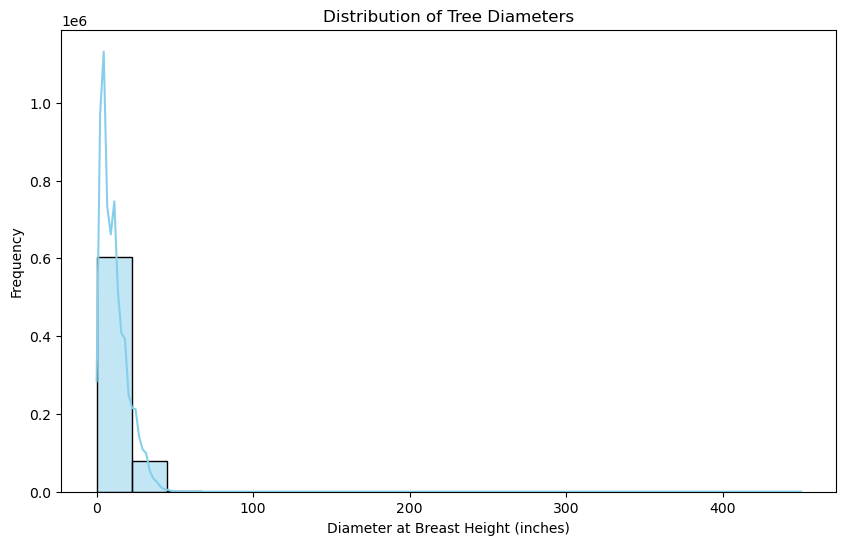

In [35]:
# Distribution of Tree Diameters
plt.figure(figsize=(10, 6))
sns.histplot(tree_census_subset['tree_dbh'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tree Diameters')
plt.xlabel('Diameter at Breast Height (inches)')
plt.ylabel('Frequency')
plt.show()

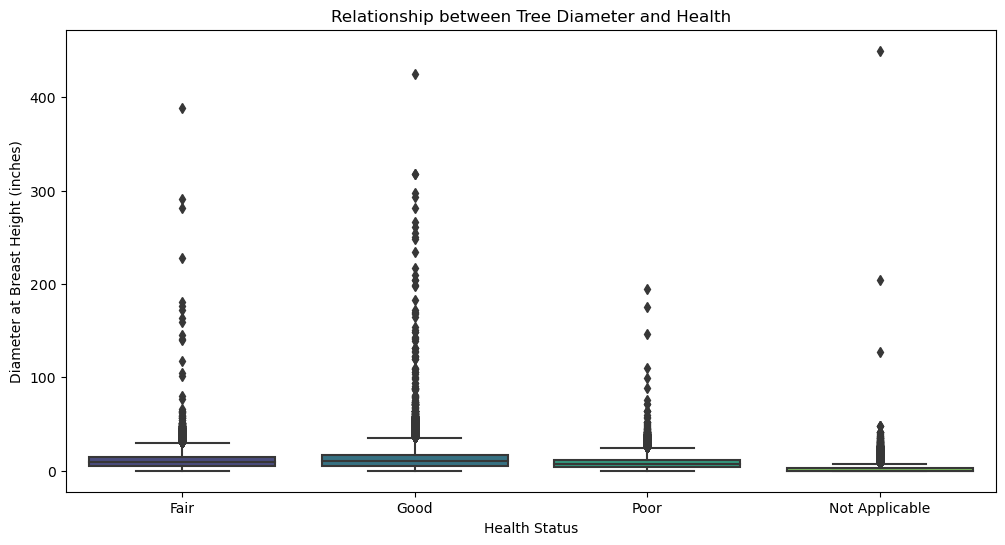

In [36]:
# Relationship between Tree Diameter and Health
plt.figure(figsize=(12, 6))
sns.boxplot(x='health', y='tree_dbh', data=tree_census_subset, palette='viridis')
plt.title('Relationship between Tree Diameter and Health')
plt.xlabel('Health Status')
plt.ylabel('Diameter at Breast Height (inches)')
plt.show()

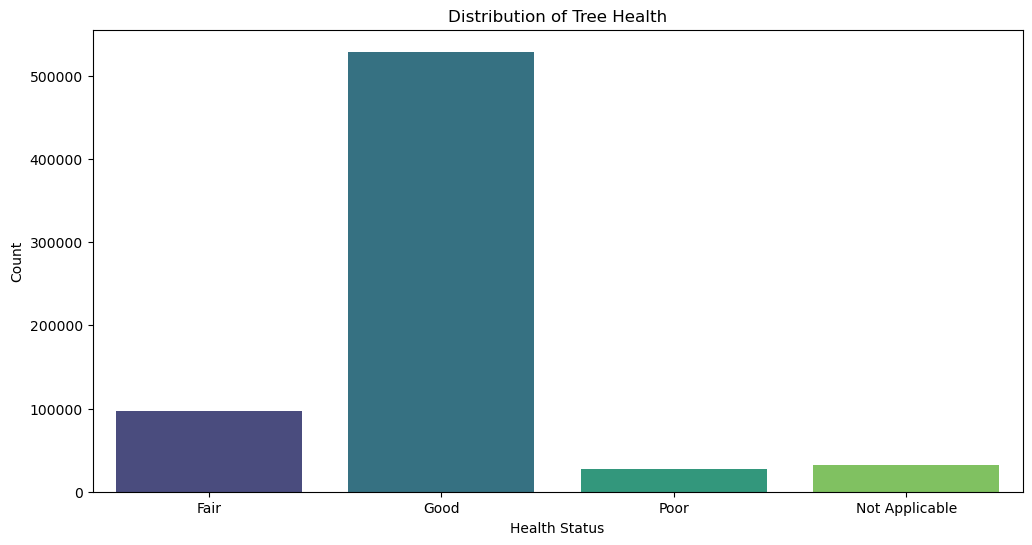

In [37]:
# Distribution of tree health and status
plt.figure(figsize=(12, 6))
sns.countplot(x='health', data=tree_census_subset, palette='viridis')
plt.title('Distribution of Tree Health')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()

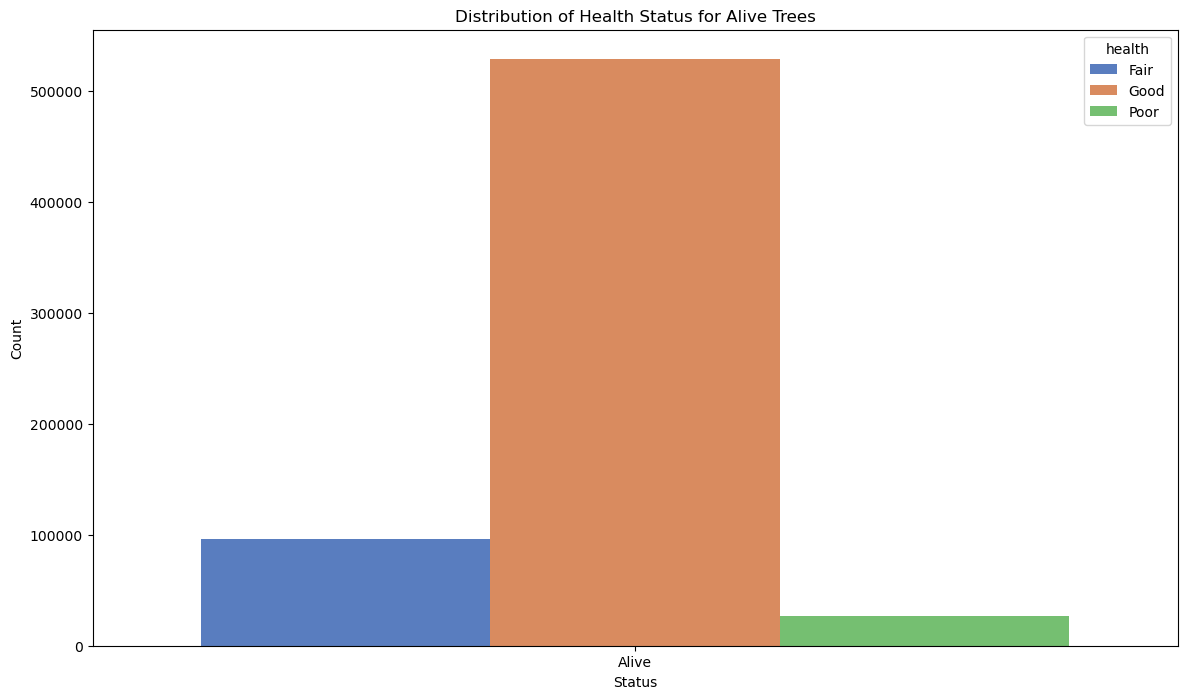

In [38]:
# Filter the data for trees that are alive
alive_trees = tree_census_subset[tree_census_subset['status'] == 'Alive']

# Distribution of categorical variables for alive trees
plt.figure(figsize=(14, 8))
sns.countplot(x='status', hue='health', data=alive_trees, palette='muted')
plt.title('Distribution of Health Status for Alive Trees')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


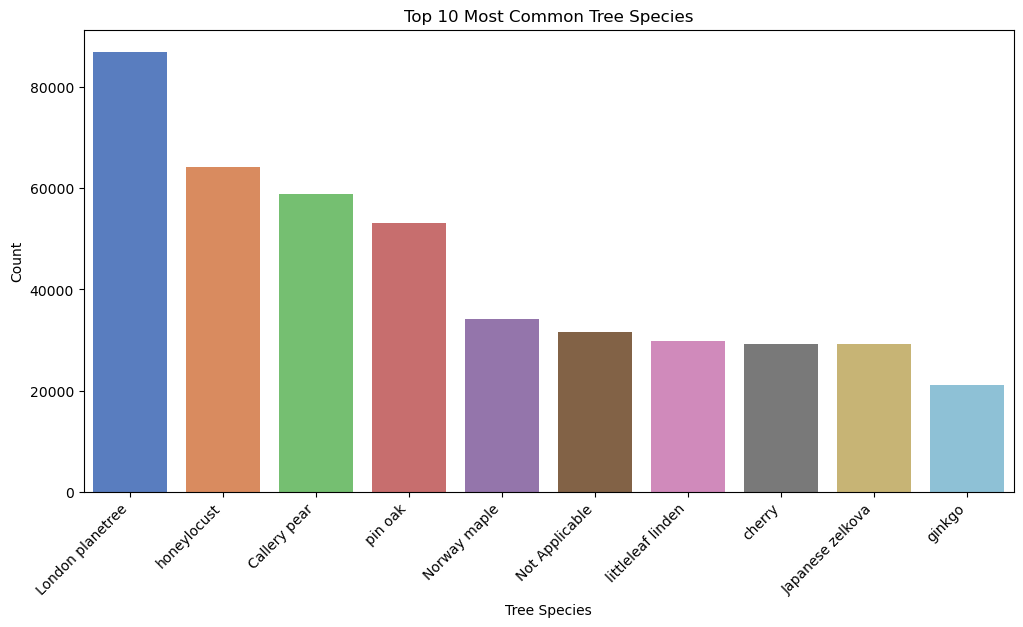

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'spc_common' is the column indicating the tree species
top_species = tree_census_subset['spc_common'].value_counts().nlargest(10)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_species.index, y=top_species.values, palette='muted')
plt.title('Top 10 Most Common Tree Species')
plt.xlabel('Tree Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

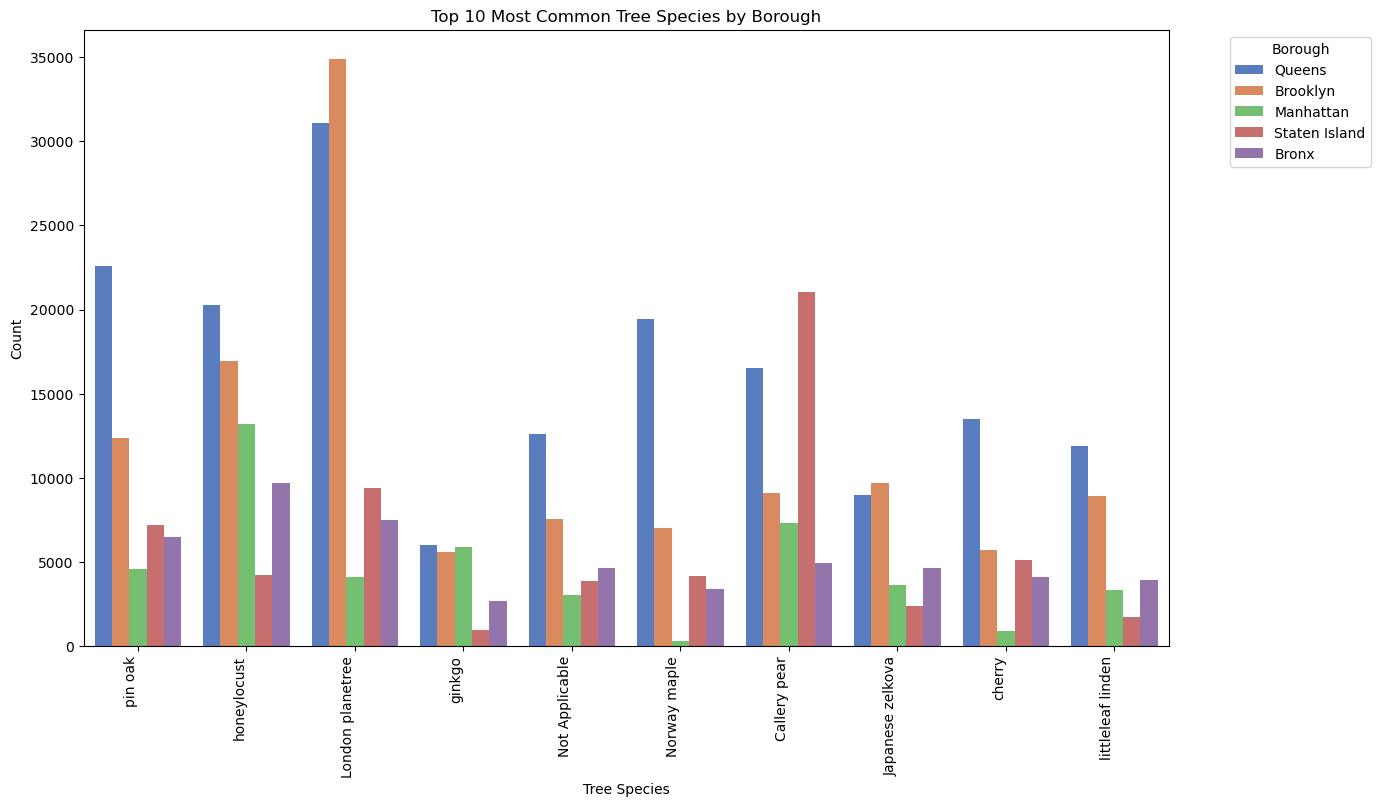

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'spc_common' is the column indicating the tree species
# and 'boroname' is the column indicating the borough
top_species = tree_census_subset['spc_common'].value_counts().nlargest(10)

# Filter the dataset for the top 10 species
top_species_data = tree_census_subset[tree_census_subset['spc_common'].isin(top_species.index)]

# Plotting the bar plot with hue for 'boroname'
plt.figure(figsize=(14, 8))
sns.countplot(x='spc_common', hue='borough', data=top_species_data, palette='muted')
plt.title('Top 10 Most Common Tree Species by Borough')
plt.xlabel('Tree Species')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')  # Show legend outside the plot
plt.show()

C:\Users\Marta\AppData\Local\Temp\ipykernel_2148\828024052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_census_subset['spc_common_top'] = tree_census_subset['spc_common'].where(tree_census_subset['spc_common'].isin(top_species), 'Other')


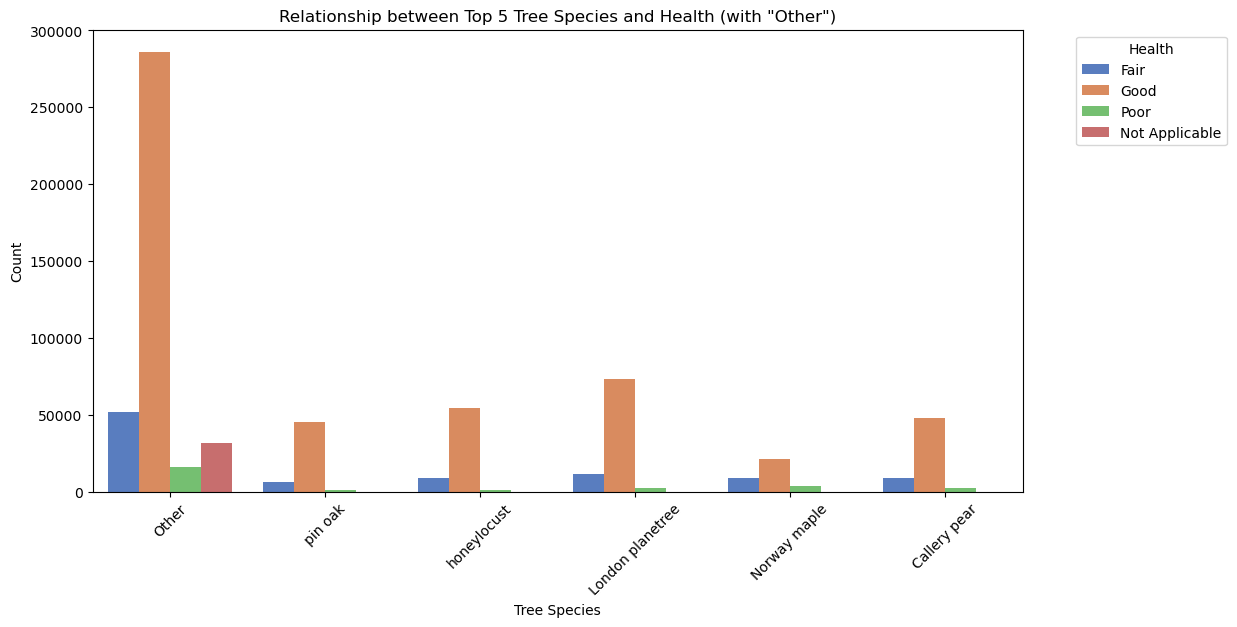

In [41]:
# Set the number of top species to display
top_n_species = 5

# Identify the top N species and create an "Other" category
top_species = tree_census_subset['spc_common'].value_counts().nlargest(top_n_species).index
tree_census_subset['spc_common_top'] = tree_census_subset['spc_common'].where(tree_census_subset['spc_common'].isin(top_species), 'Other')

# Relationship between tree species and health
plt.figure(figsize=(12, 6))
sns.countplot(x='spc_common_top', hue='health', data=tree_census_subset[tree_census_subset['health'].notnull()], palette='muted')
plt.title(f'Relationship between Top {top_n_species} Tree Species and Health (with "Other")')
plt.xlabel('Tree Species')
plt.ylabel('Count')
plt.legend(title='Health', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


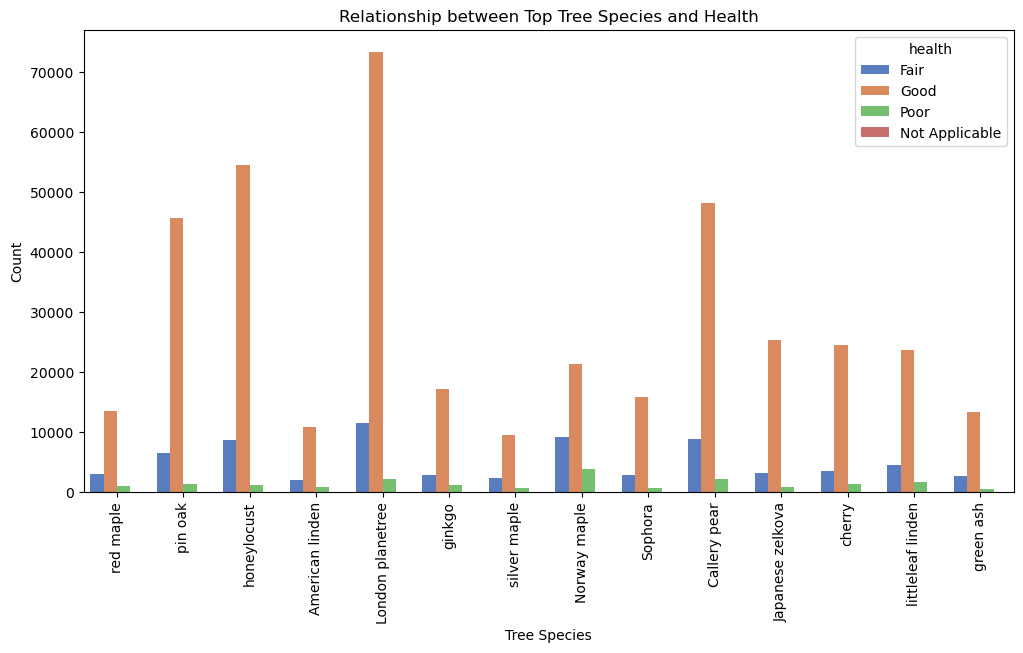

In [42]:
# Identify the top N species
top_n_species = 15  # Change to 15
top_species = tree_census_subset['spc_common'].value_counts().nlargest(top_n_species).index

# Filter out 'Not Applicable' and 'Other' categories
filtered_species = [species for species in top_species if species not in ['Not Applicable', 'Other']]

# Relationship between tree species and health
plt.figure(figsize=(12, 6))
sns.countplot(x='spc_common', hue='health', data=tree_census_subset[tree_census_subset['health'].notnull() & tree_census_subset['spc_common'].isin(filtered_species)], palette='muted')
plt.title('Relationship between Top Tree Species and Health')
plt.xlabel('Tree Species')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


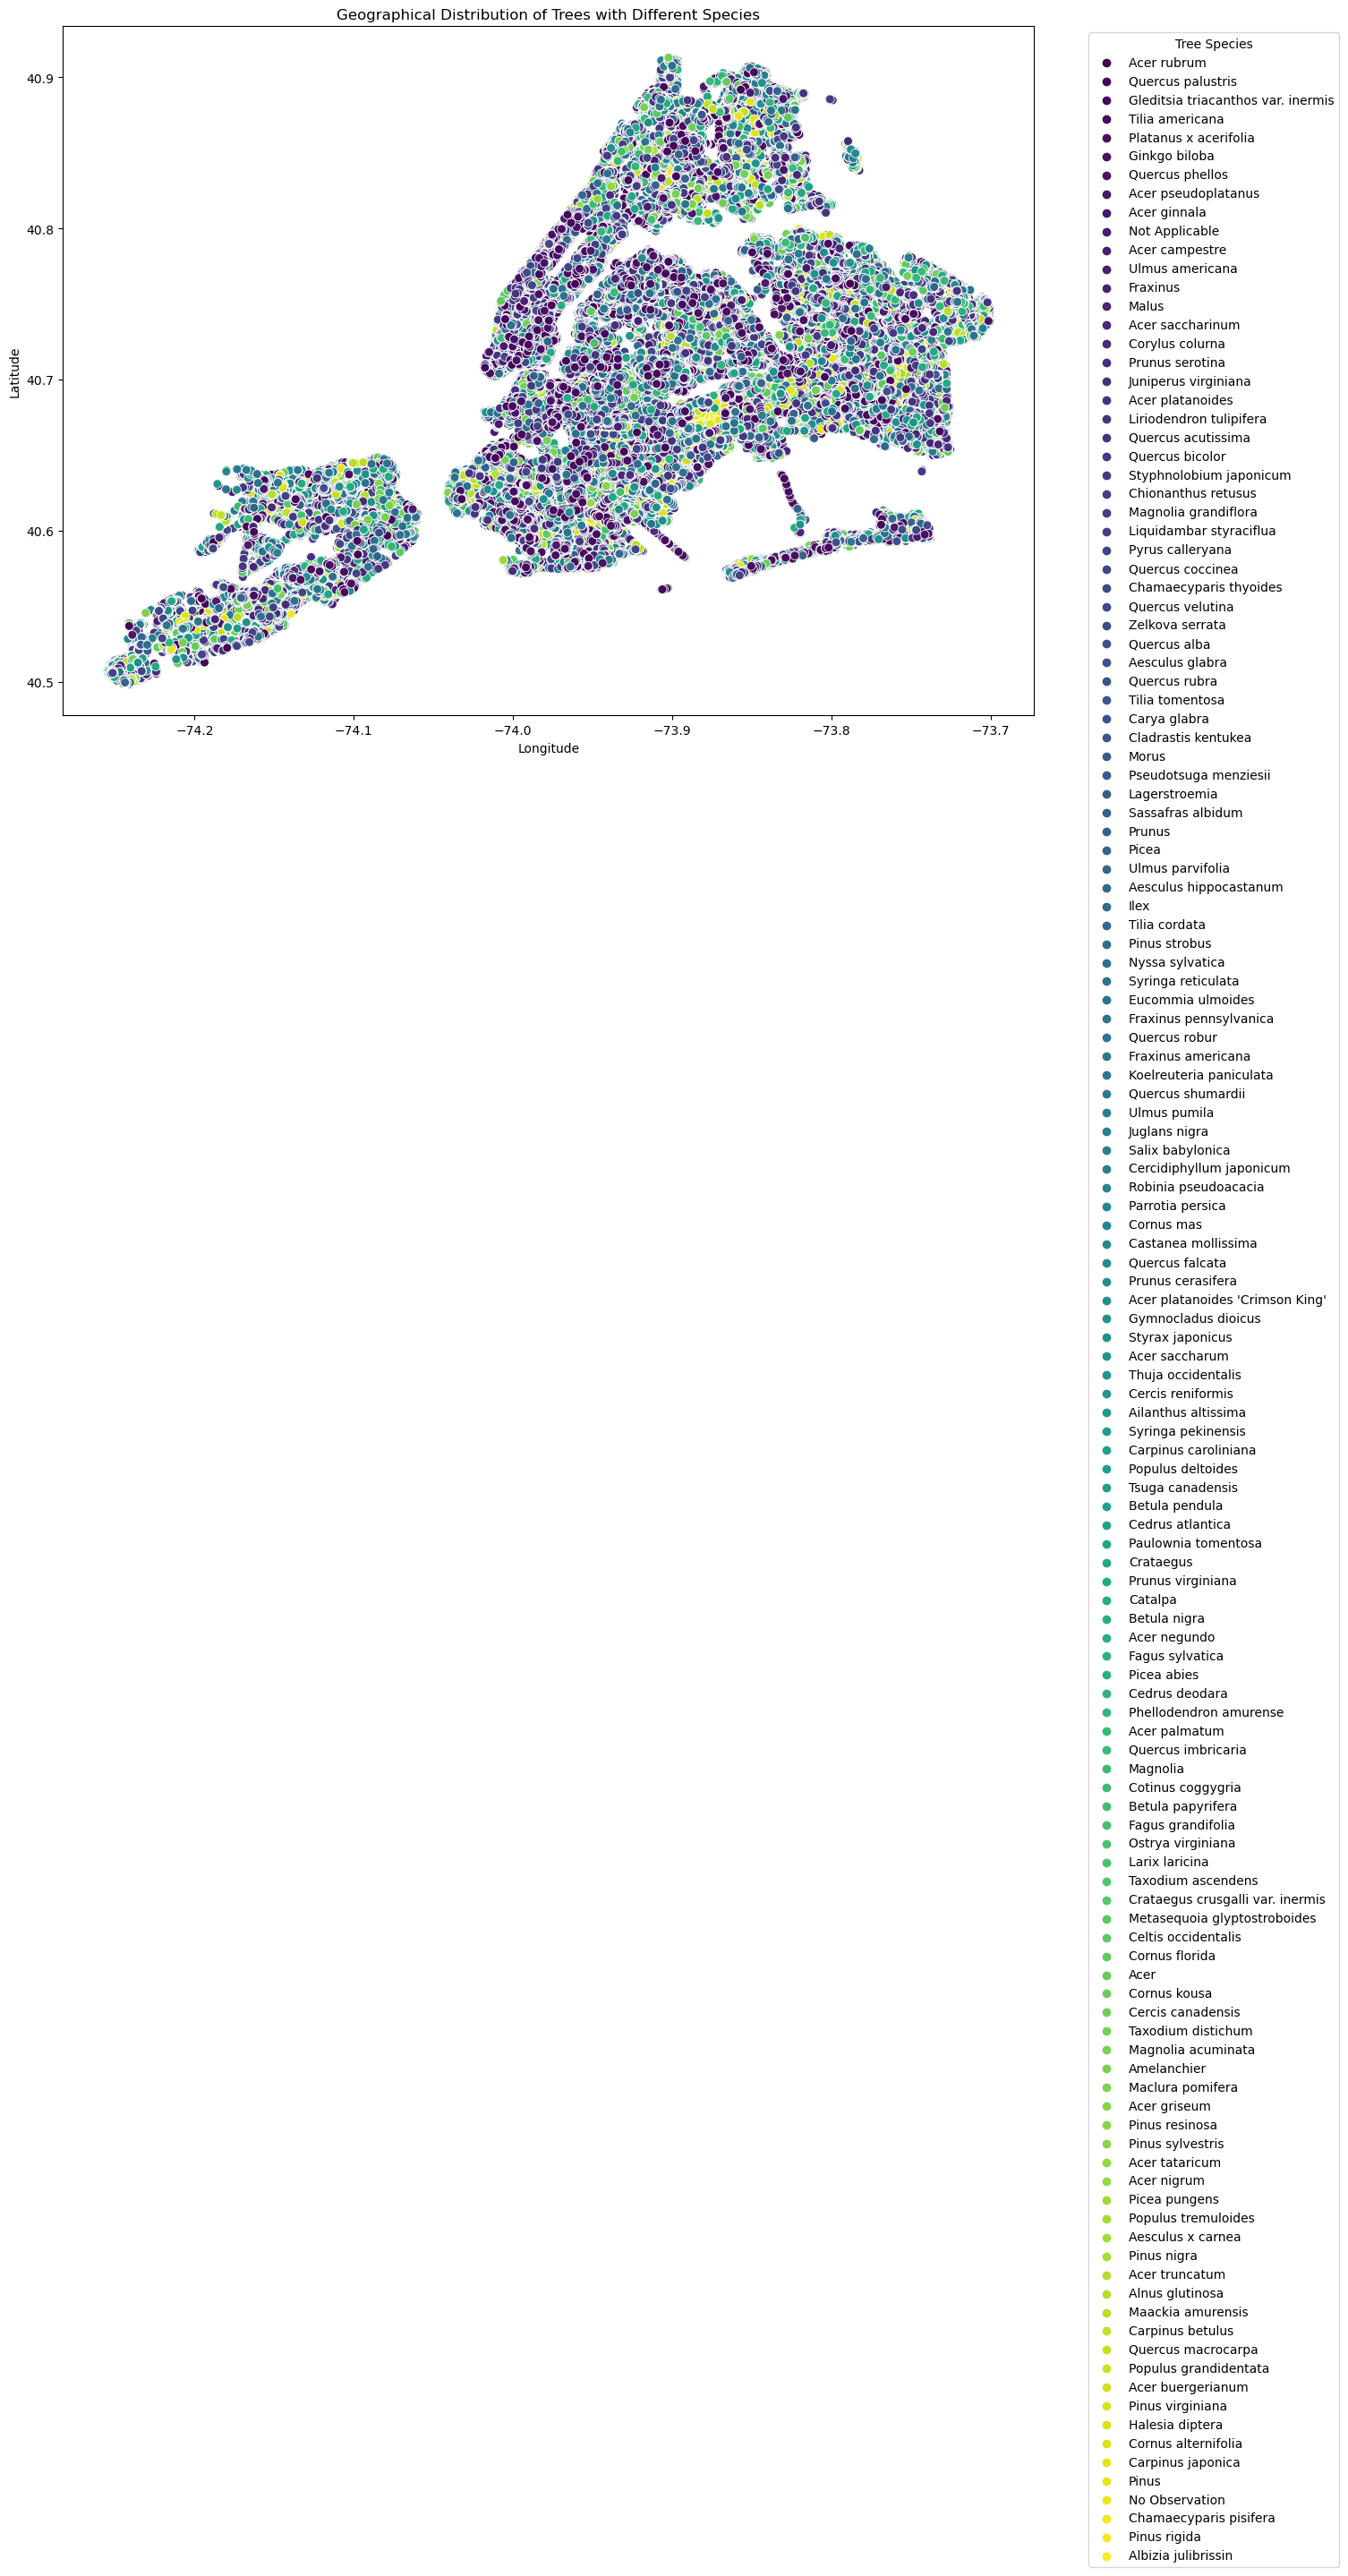

In [43]:
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(14, 10))

# Scatter plot for geographical distribution with different colors for each tree species
scatter_plot = sns.scatterplot(x='longitude', y='latitude', hue='spc_latin', data=tree_census_subset, palette='viridis', legend='full', s=50)

# Add labels and title
plt.title('Geographical Distribution of Trees with Different Species')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the legend
plt.legend(title='Tree Species', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


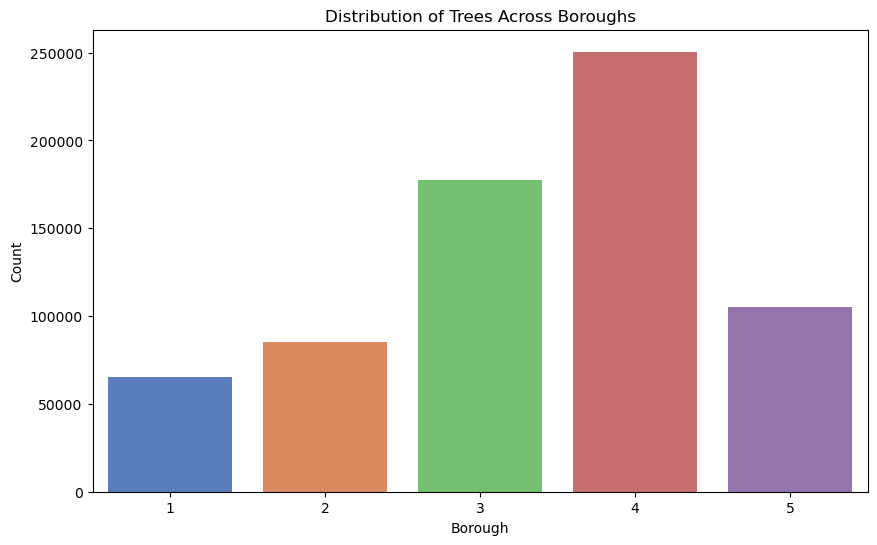

In [44]:
# Distribution of trees across boroughs
plt.figure(figsize=(10, 6))
sns.countplot(x='borocode', data=tree_census_subset, palette='muted')
plt.title('Distribution of Trees Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

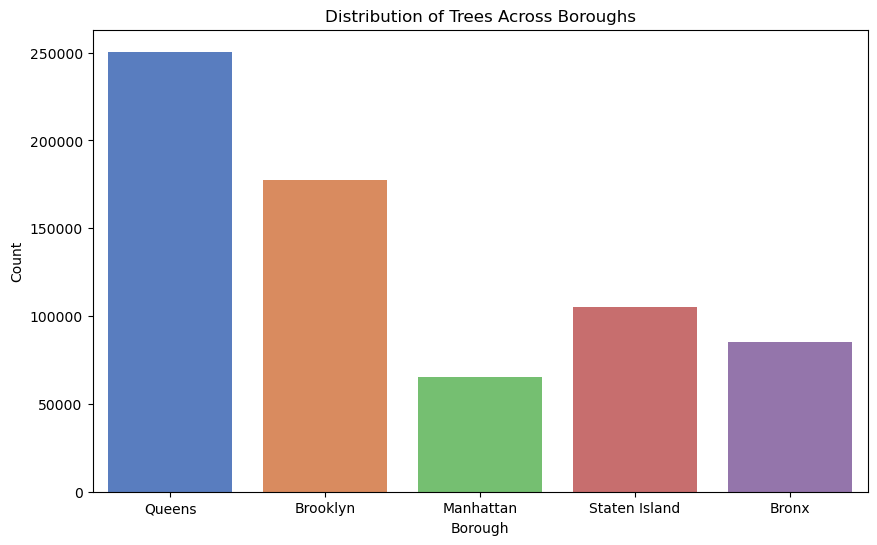

In [45]:
# Distribution of trees across boroughs
plt.figure(figsize=(10, 6))
sns.countplot(x='borough', data=tree_census_subset, palette='muted')
plt.title('Distribution of Trees Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

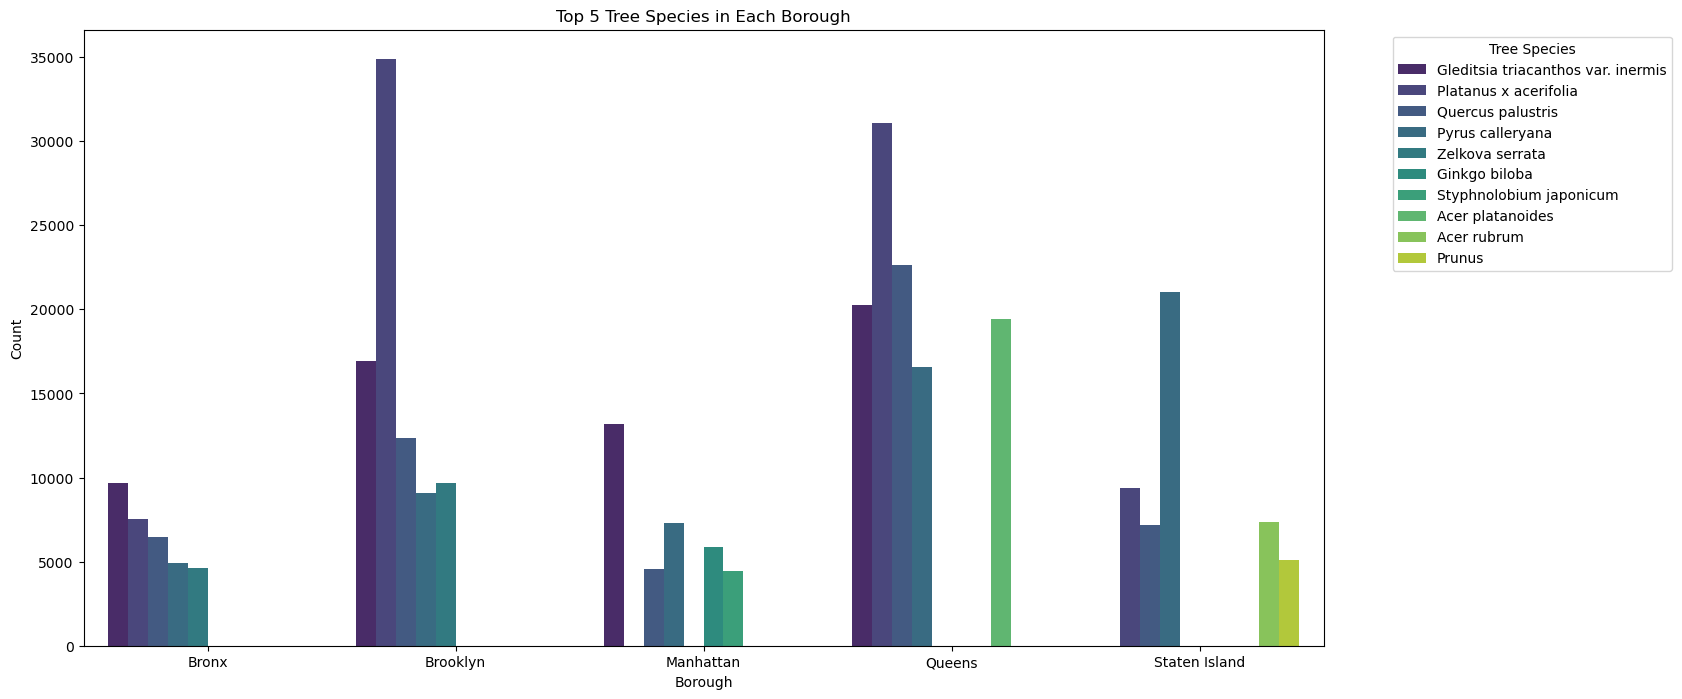

In [46]:
# Set the number of top species to display
top_n_species = 5

# Identify the top N species in each borough
top_species_by_borough = tree_census_subset.groupby(['borough', 'spc_latin']).size().reset_index(name='count')
top_species_by_borough = top_species_by_borough.sort_values(by=['borough', 'count'], ascending=[True, False])
top_species_by_borough = top_species_by_borough.groupby('borough').head(top_n_species)

# Create a bar plot
plt.figure(figsize=(16, 8))
sns.barplot(x='borough', y='count', hue='spc_latin', data=top_species_by_borough, palette='viridis')
plt.title(f'Top {top_n_species} Tree Species in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend(title='Tree Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



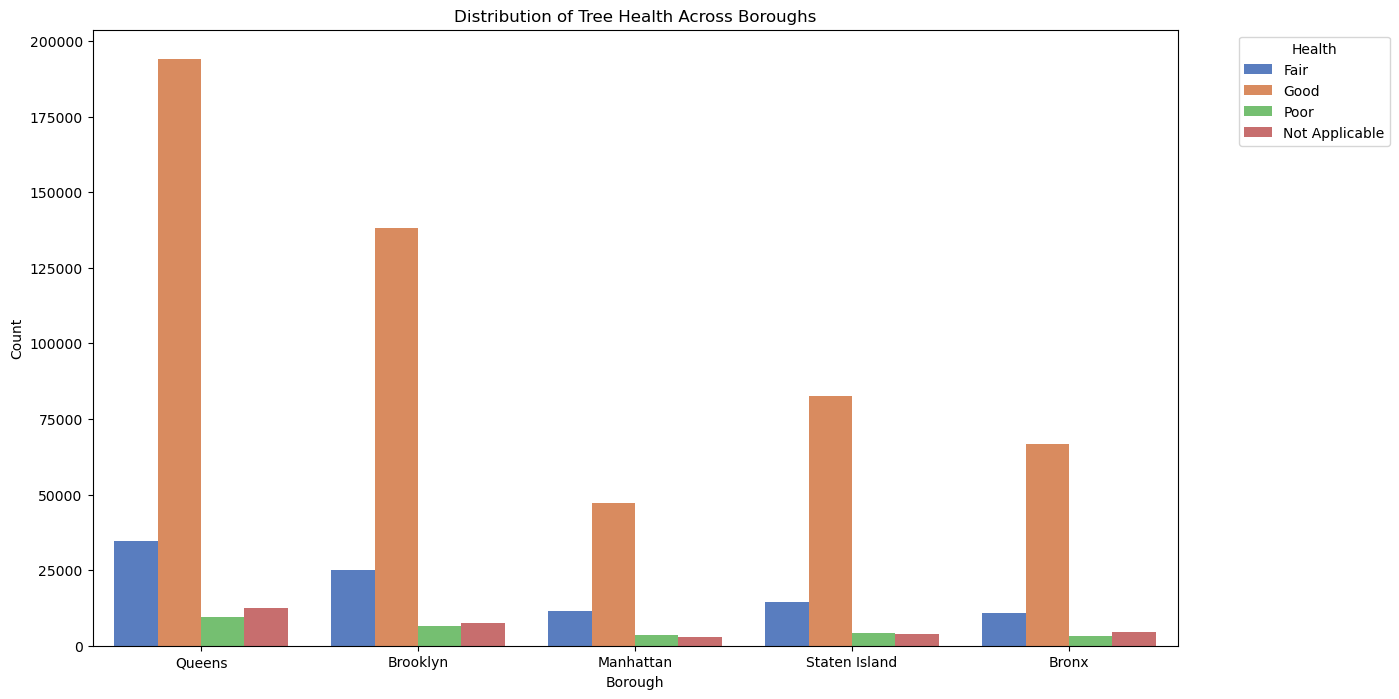

In [47]:
# Relationship between tree health, borough, and species
plt.figure(figsize=(14, 8))
sns.countplot(x='borough', hue='health', data=tree_census_subset, palette='muted')
plt.title('Distribution of Tree Health Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend(title='Health', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [48]:
tree_census_subset.columns

Index(['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health',
       'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type',
       'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire',
       'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other',
       'address', 'postcode', 'zip_city', 'community board', 'borocode',
       'borough', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name',
       'boro_ct', 'state', 'latitude', 'longitude', 'spc_common_top'],
      dtype='object')

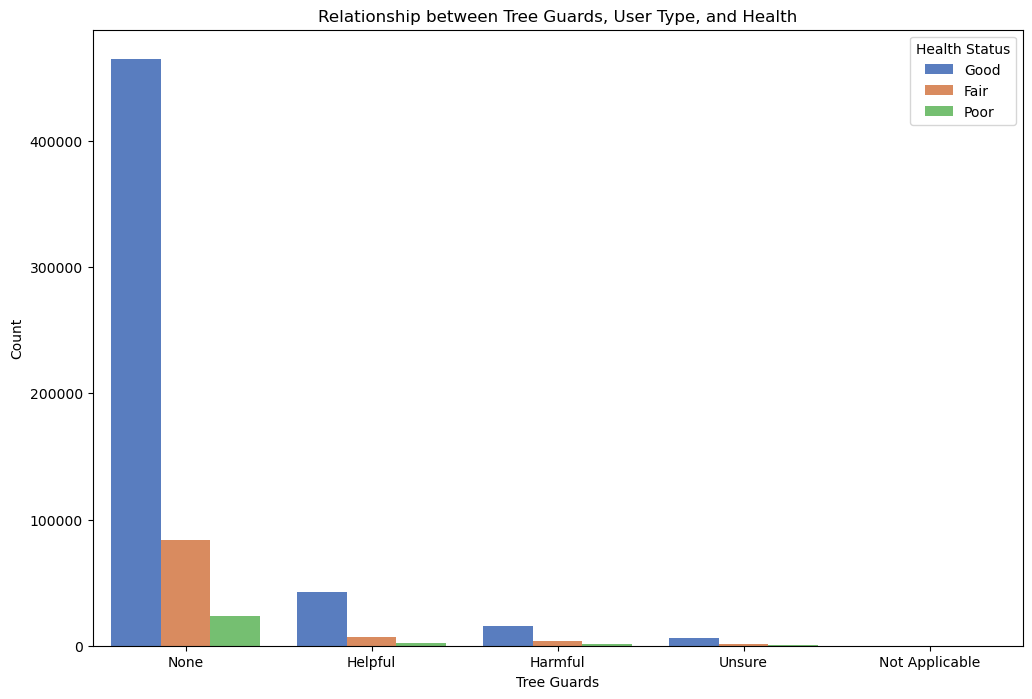

In [49]:
# Subset the data
tree_guard_subset = tree_census_subset[['health', 'guards', 'user_type']]

# Filter out rows where 'health' is not null
tree_guard_subset = tree_guard_subset.dropna(subset=['health'])

# Plot the relationship between guards, user_type, and health
plt.figure(figsize=(12, 8))
sns.countplot(x='guards', hue='health', data=tree_guard_subset, palette='muted', hue_order=['Good', 'Fair', 'Poor'])
plt.title('Relationship between Tree Guards, User Type, and Health')
plt.xlabel('Tree Guards')
plt.ylabel('Count')
plt.legend(title='Health Status')
plt.show()


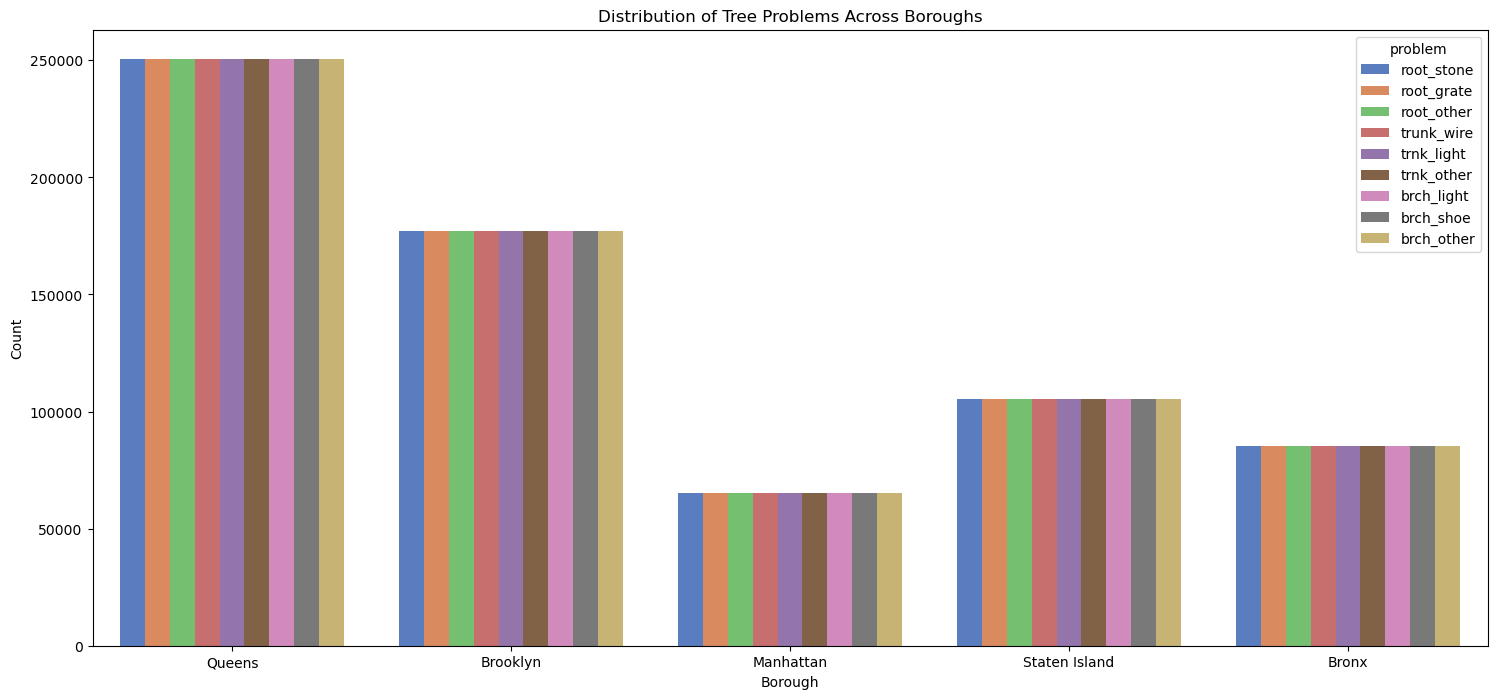

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the list of all problems
all_problems = ['root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
                'brch_light', 'brch_shoe', 'brch_other']

# Subset the data to include only relevant columns
problems_subset = tree_census_subset[['borough'] + all_problems]

# Melt the DataFrame to make it suitable for count plot
problems_melted = pd.melt(problems_subset, id_vars='borough', value_vars=all_problems, var_name='problem', value_name='count')

# Set up the figure and axes
plt.figure(figsize=(18, 8))

# Relationship between tree problems, borough, and count
sns.countplot(x='borough', hue='problem', data=problems_melted, palette='muted')
plt.title('Distribution of Tree Problems Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')

# Show the plot
plt.show()


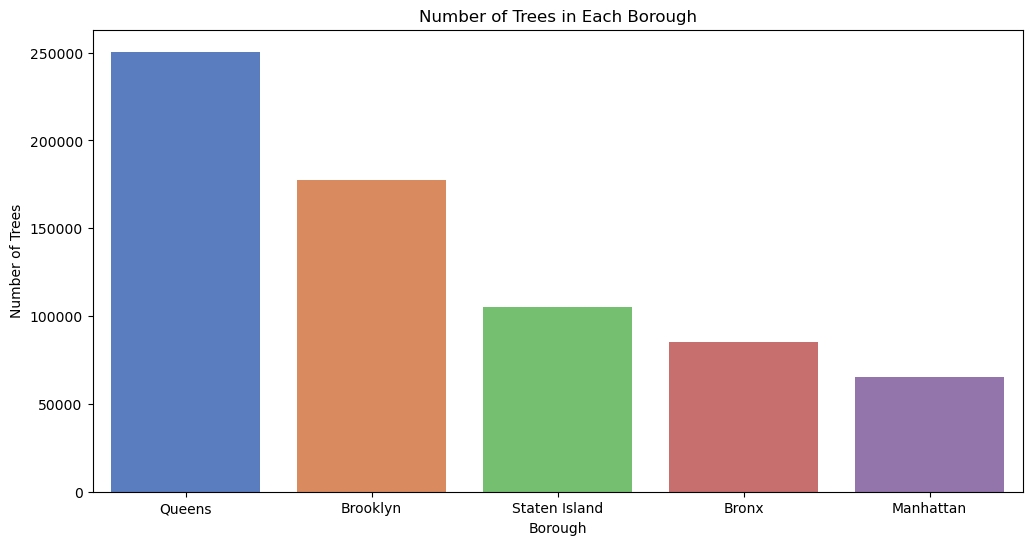

The borough with the most trees is: Queens
The most common tree species in Queens is: London planetree


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group by borough and calculate the total number of trees in each borough
trees_by_borough = tree_census_subset.groupby('borough')['tree_id'].count().reset_index().sort_values(by='tree_id', ascending=False)

# Bar plot for the number of trees in each borough
plt.figure(figsize=(12, 6))
sns.barplot(x='borough', y='tree_id', data=trees_by_borough, palette='muted')
plt.title('Number of Trees in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Trees')
plt.show()

# Identify the borough with the most trees
most_trees_borough = trees_by_borough.iloc[0]['borough']
print(f"The borough with the most trees is: {most_trees_borough}")

# Subset the data for the borough with the most trees
most_trees_species = tree_census_subset[tree_census_subset['borough'] == most_trees_borough]

# Identify the most common tree species in the borough with the most trees
most_common_species = most_trees_species['spc_common'].mode().iloc[0]
print(f"The most common tree species in {most_trees_borough} is: {most_common_species}")


In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(tree_census_subset['tree_dbh', 'stump_diam', 'latitude','longitude'].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

KeyError: ('tree_dbh', 'stump_diam', 'latitude', 'longitude')

<Figure size 1200x800 with 0 Axes>

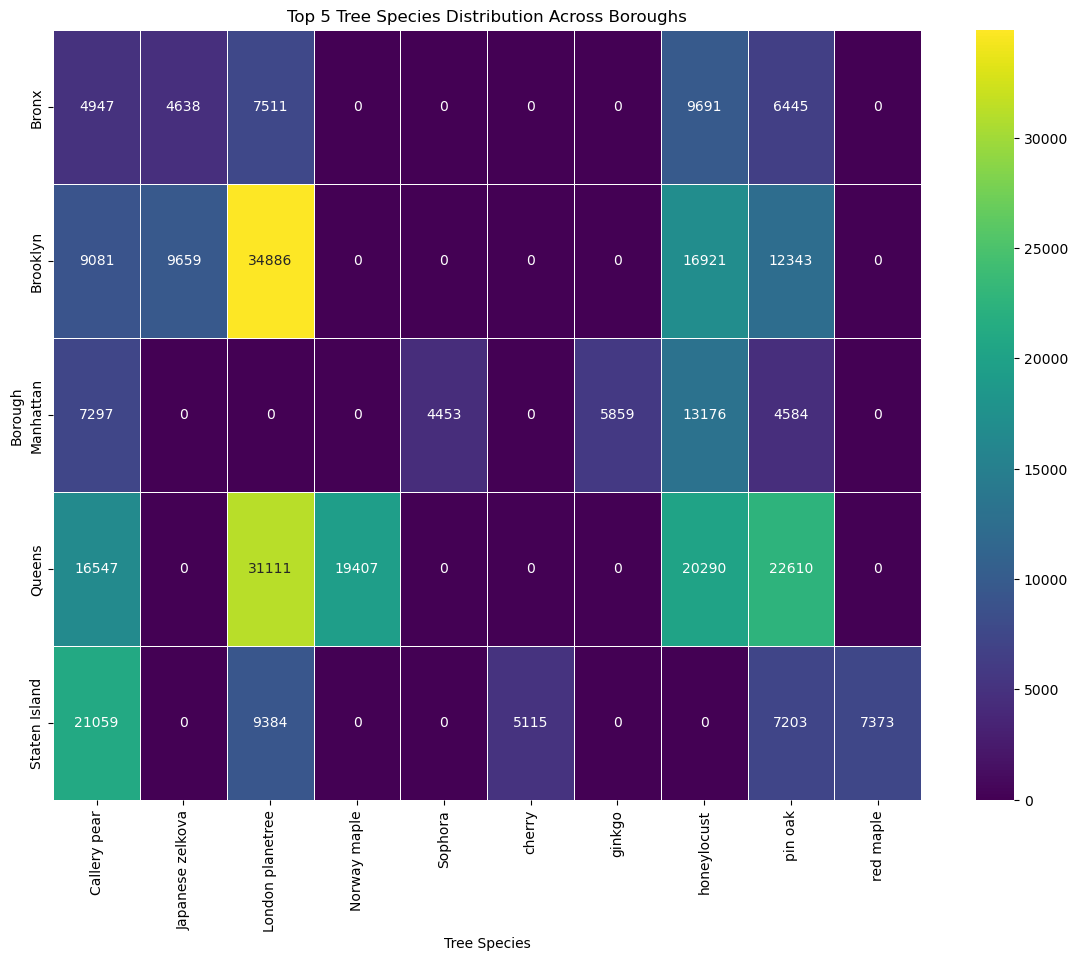

In [97]:
# Set the number of top species to display for each borough
top_n_species = 5

# Identify the top N species in each borough
top_species_by_borough = tree_census_subset.groupby('borough')['spc_common'].value_counts().groupby('borough').head(top_n_species).reset_index(name='count')

# Pivot the data for easy plotting
species_pivot = top_species_by_borough.pivot(index='borough', columns='spc_common', values='count').fillna(0)

# Plotting a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(species_pivot, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title(f'Top {top_n_species} Tree Species Distribution Across Boroughs')
plt.xlabel('Tree Species')
plt.ylabel('Borough')
plt.show()


#### stump showing 0 because the tree is alive so no stump to measure

In [66]:
# difference between the expected and observed frequencies in a contingency table. 
#A larger chi-square value suggests a greater difference.
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(pd.crosstab(tree_census_subset['health'], tree_census_subset['borough']))
print(f"Chi-square value: {chi2}, p-value: {p}")

Chi-square value: 1866.8086508818437, p-value: 0.0
